<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_5_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.663974,74.434342,22.960228,0.551070,201.609614,201.051764,0.557849
1,0.0,1.0,34.071201,92.195834,90.152381,0.523022,226.942438,226.453924,0.488514
2,0.0,2.0,55.591774,63.913989,23.694852,-0.559004,152.641610,153.192935,-0.551325
3,0.0,3.0,49.614848,63.336003,58.462157,-0.205473,181.207535,181.445605,-0.238070
4,0.0,4.0,30.954399,88.087505,68.488500,0.790943,198.321347,197.542248,0.779100
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.654908,92.533641,96.839281,0.821100,233.848930,233.091710,0.757220
119996,999.0,116.0,31.641565,22.907767,22.814871,0.281731,87.645935,87.178120,0.467815
119997,999.0,117.0,88.100907,40.099114,26.173635,-0.462945,163.910711,164.200803,-0.290092
119998,999.0,118.0,34.334430,35.953041,53.309381,0.066506,133.663359,133.452164,0.211195


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.663974,74.434342,22.960228,0.551070,201.609614,201.051764,0.557849
1,0.0,1.0,34.071201,92.195834,90.152381,0.523022,226.942438,226.453924,0.488514
2,0.0,2.0,55.591774,63.913989,23.694852,-0.559004,152.641610,153.192935,-0.551325
3,0.0,3.0,49.614848,63.336003,58.462157,-0.205473,181.207535,181.445605,-0.238070
4,0.0,4.0,30.954399,88.087505,68.488500,0.790943,198.321347,197.542248,0.779100
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.654908,92.533641,96.839281,0.821100,233.848930,233.091710,0.757220
119996,999.0,116.0,31.641565,22.907767,22.814871,0.281731,87.645935,87.178120,0.467815
119997,999.0,117.0,88.100907,40.099114,26.173635,-0.462945,163.910711,164.200803,-0.290092
119998,999.0,118.0,34.334430,35.953041,53.309381,0.066506,133.663359,133.452164,0.211195


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.663974  74.434342  22.960228  ...  201.609614  201.051764  0.557849
      1.0    34.071201  92.195834  90.152381  ...  226.942438  226.453924  0.488514
      2.0    55.591774  63.913989  23.694852  ...  152.641610  153.192935 -0.551325
      3.0    49.614848  63.336003  58.462157  ...  181.207535  181.445605 -0.238070
      4.0    30.954399  88.087505  68.488500  ...  198.321347  197.542248  0.779100
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  33.654908  92.533641  96.839281  ...  233.848930  233.091710  0.757220
      116.0  31.641565  22.907767  22.814871  ...   87.645935   87.178120  0.467815
      117.0  88.100907  40.099114  26.173635  ...  163.910711  164.200803 -0.290092
      118.0  34.334430  35.953041  53.309381  ...  133.663359  133.452164  0.211195
      119.0  51.353421  58.594672  27.201993  ...  148.111607  147.081625  1.029982

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.663974  74.434342  22.960228  ...  201.609614  201.051764  0.557849
      1.0    34.071201  92.195834  90.152381  ...  226.942438  226.453924  0.488514
      2.0    55.591774  63.913989  23.694852  ...  152.641610  153.192935 -0.551325
      3.0    49.614848  63.336003  58.462157  ...  181.207535  181.445605 -0.238070
      4.0    30.954399  88.087505  68.488500  ...  198.321347  197.542248  0.779100
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  33.654908  92.533641  96.839281  ...  233.848930  233.091710  0.757220
      116.0  31.641565  22.907767  22.814871  ...   87.645935   87.178120  0.467815
      117.0  88.100907  40.099114  26.173635  ...  163.910711  164.200803 -0.290092
      118.0  34.334430  35.953041  53.309381  ...  133.663359  133.452164  0.211195
      119.0  51.353421  58.594672  27.201993  ...  148.111607  147.081625  1.029982

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.663974,74.434342,22.960228,0.551070,201.609614,201.051764,0.557849
1,0.0,1.0,34.071201,92.195834,90.152381,0.523022,226.942438,226.453924,0.488514
2,0.0,2.0,55.591774,63.913989,23.694852,-0.559004,152.641610,153.192935,-0.551325
3,0.0,3.0,49.614848,63.336003,58.462157,-0.205473,181.207535,181.445605,-0.238070
4,0.0,4.0,30.954399,88.087505,68.488500,0.790943,198.321347,197.542248,0.779100
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.654908,92.533641,96.839281,0.821100,233.848930,233.091710,0.757220
119996,999.0,116.0,31.641565,22.907767,22.814871,0.281731,87.645935,87.178120,0.467815
119997,999.0,117.0,88.100907,40.099114,26.173635,-0.462945,163.910711,164.200803,-0.290092
119998,999.0,118.0,34.334430,35.953041,53.309381,0.066506,133.663359,133.452164,0.211195


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    93.663974  74.434342  22.960228  ...  201.609614  201.051764  0.557849
      1.0    34.071201  92.195834  90.152381  ...  226.942438  226.453924  0.488514
      2.0    55.591774  63.913989  23.694852  ...  152.641610  153.192935 -0.551325
      3.0    49.614848  63.336003  58.462157  ...  181.207535  181.445605 -0.238070
      4.0    30.954399  88.087505  68.488500  ...  198.321347  197.542248  0.779100
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  33.654908  92.533641  96.839281  ...  233.848930  233.091710  0.757220
      116.0  31.641565  22.907767  22.814871  ...   87.645935   87.178120  0.467815
      117.0  88.100907  40.099114  26.173635  ...  163.910711  164.200803 -0.290092
      118.0  34.334430  35.953041  53.309381  ...  133.663359  133.452164  0.211195
      119.0  51.353421  58.594672  27.201993  ...  148.111607  147.081625  1.029982

[120000 rows x 7 columns]

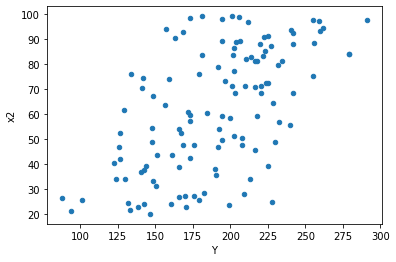

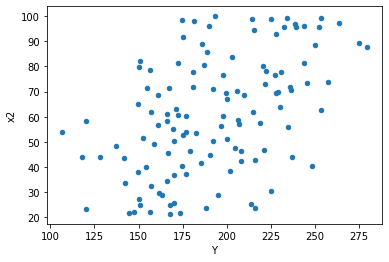

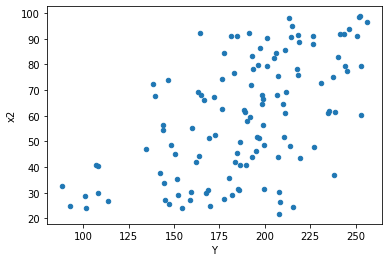

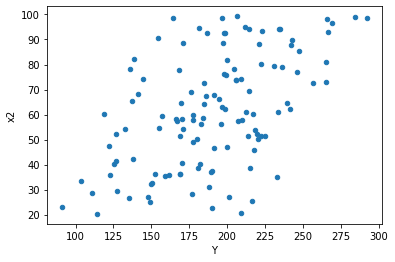

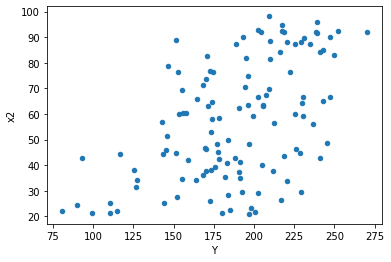

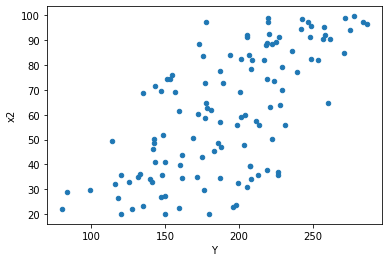

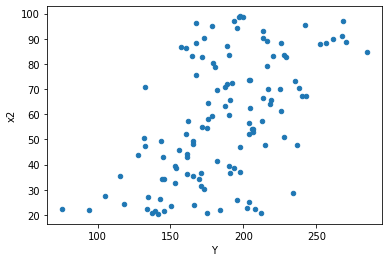

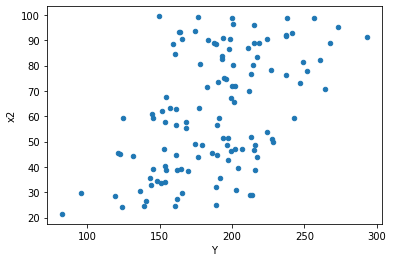

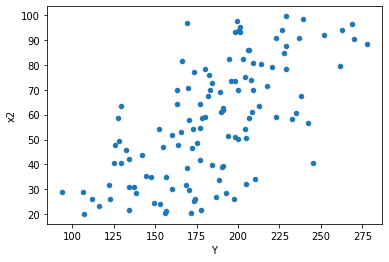

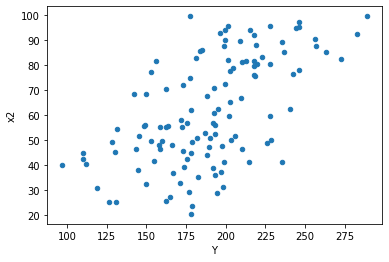

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,15.240205132011496,29.33853890268092,0.33867122515581105,0.6519675311706871,1.9250750661522515,0.03033491584727832,0.9848325420763608,0.01516745792363916,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,16.399898693923685,21.814423234361684,0.3644421931983041,0.484764960763593,1.3301559748319745,0.3421049963580194,0.8289475018209903,0.1710524981790097,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,14.342763617776235,27.785556931415975,0.3187280803950274,0.6174568206981328,1.9372526572897653,0.028802530007844718,0.9855987349960776,0.014401265003922359,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,18.60374731651557,28.94593490492285,0.41341660703367933,0.6432429978871744,1.5559195904163863,0.14193637334764353,0.9290318133261782,0.07096818667382176,Reject005=1 : Homoscedasticity
9.0,45.0,45.0,18.218398435549048,24.034882654754433,0.40485329856775665,0.5341085034389874,1.3192642997562203,0.35615132687812423,0.8219243365609379,0.17807566343906212,Reject005=1 : Homoscedasticity
10.0,45.0,45.0,20.849977685024392,20.900799483659778,0.4633328374449865,0.4644622107479951,1.0024374989461926,0.9935209008658665,0.5032395495670667,0.49676045043293326,Reject005=1 : Homoscedasticity
12.0,45.0,45.0,13.710693201358382,19.10624577727272,0.30468207114129736,0.4245832394949493,1.3935287951290294,0.2694424979333303,0.8652787510333348,0.13472124896666515,Reject005=1 : Homoscedasticity
14.0,45.0,45.0,17.25813666017188,29.082712680221366,0.3835141480038195,0.6462825040049193,1.6851594846469204,0.08345127088289894,0.9582743645585505,0.04172563544144947,Reject005=1 : Homoscedasticity
15.0,45.0,45.0,18.285712023802695,21.653383253405323,0.40634915608450434,0.4811862945201183,1.1841695431503514,0.5730883253636863,0.7134558373181569,0.28654416268184313,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,15.240205132011496,29.33853890268092,0.33867122515581105,0.6519675311706871,1.9250750661522515,0.03033491584727832,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,16.399898693923685,21.814423234361684,0.3644421931983041,0.484764960763593,1.3301559748319745,0.3421049963580194,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,22.657422567100184,15.27077240845656,0.503498279268893,0.3393504979657013,0.6739854175042203,0.1895835663108276,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,21.913357299492425,21.246643799640722,0.4869634955442761,0.47214763999201603,0.9695750180705014,0.917917737243199,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,14.342763617776235,27.785556931415975,0.3187280803950274,0.6174568206981328,1.9372526572897653,0.028802530007844718,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,21.28789962739436,18.666255820779977,0.4730644361643191,0.4148056849062217,0.8768481694999766,0.6612396654019039,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,23.191937731935866,17.184201528077473,0.5153763940430193,0.3818711450683883,0.7409558324406161,0.31819016225770697,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,31.69899288466229,23.620683520490736,0.7044220641036064,0.5249040782331275,0.745155645999079,0.3273657006789678,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,18.60374731651557,28.94593490492285,0.41341660703367933,0.6432429978871744,1.5559195904163863,0.14193637334764353,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      957
Reject005=0 : Heteroscedasticity     43
Name: Result_test, dtype: int64